In [1]:
import polars as pl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plot_utils
import read_utils

For fees, check https://uniswapv3book.com/milestone_5/swap-fees.html

In [2]:
df = pl.read_csv("data/pool_creations.tsv", separator="\t", try_parse_dates=True)
df

block_number,block_timestamp,transaction_hash,transaction_index,log_index,token_0,token_1,fee,tick_spacing,pool_address
i64,datetime[μs],str,i64,i64,str,str,i64,i64,str
12369739,2021-05-04 19:52:36,"""0x37d8f4b1b371fde9e4b1942588d1…",33,24,"""0x1f9840a85d5af5bf1d1762f925bd…","""0xc02aaa39b223fe8d0a0e5c4f27ea…",3000,60,"""0x1d42064fc4beb5f8aaf85f4617ae…"
12369760,2021-05-04 19:58:13,"""0xa877e18bbdcf69b751f56b4aa5b9…",82,80,"""0x6b175474e89094c44da98b954eed…","""0xa0b86991c6218b36c1d19d4a2e9e…",500,10,"""0x6c6bc977e13df9b0de53b2515222…"
12369811,2021-05-04 20:07:45,"""0x004cb88319b0678320cb0a04fab8…",255,147,"""0xa0b86991c6218b36c1d19d4a2e9e…","""0xc02aaa39b223fe8d0a0e5c4f27ea…",10000,200,"""0x7bea39867e4169dbe237d55c8242…"
12369821,2021-05-04 20:09:34,"""0xf87d91f3d72a8e912c020c2e3161…",17,36,"""0x2260fac5e5542a773aa44fbcfedf…","""0xc02aaa39b223fe8d0a0e5c4f27ea…",3000,60,"""0xcbcdf9626bc03e24f779434178a7…"
12369854,2021-05-04 20:16:08,"""0x8c2161cdf81dacef87759fa8f1f8…",85,62,"""0x6b175474e89094c44da98b954eed…","""0xc02aaa39b223fe8d0a0e5c4f27ea…",3000,60,"""0xc2e9f25be6257c210d7adf0d4cd6…"
…,…,…,…,…,…,…,…,…,…
22820591,2025-06-30 23:43:23,"""0x23459e77311348babf0501cfeec1…",0,4,"""0x6943d893e6cd8ddf21814269e896…","""0xc02aaa39b223fe8d0a0e5c4f27ea…",10000,200,"""0x6913a9769443c8ae1b8fbcfa425f…"
22820608,2025-06-30 23:46:47,"""0xe8faa686ccc6bba8645975c58a2a…",6,79,"""0x00121a84264aef780bbfbe57982d…","""0xc02aaa39b223fe8d0a0e5c4f27ea…",3000,60,"""0x1d87c948b39f386d46d4f96a25e6…"
22820619,2025-06-30 23:48:59,"""0xe39dfa3d4f4a3b5f701bb96a938d…",47,324,"""0x645b8fe2600376b1ae4ba23b0fb6…","""0xc02aaa39b223fe8d0a0e5c4f27ea…",10000,200,"""0x06f079a435bc9844e57bfb0ce48e…"


In [3]:
data = df.group_by("block_number").len(name="num_creations").sort("block_number", descending=False)
data = data.join(df.select("block_number", "block_timestamp"), on="block_number", how="left")
data

block_number,num_creations,block_timestamp
i64,u32,datetime[μs]
12369739,1,2021-05-04 19:52:36
12369760,1,2021-05-04 19:58:13
12369811,1,2021-05-04 20:07:45
12369821,1,2021-05-04 20:09:34
12369854,1,2021-05-04 20:16:08
…,…,…
22820591,1,2025-06-30 23:43:23
22820608,1,2025-06-30 23:46:47
22820619,1,2025-06-30 23:48:59


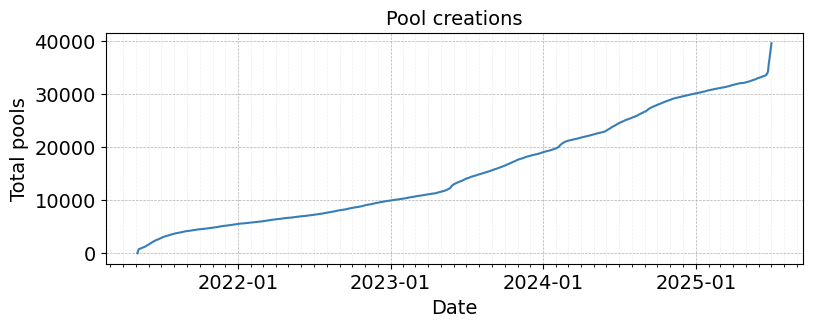

In [4]:
fig = plt.figure(figsize=(9,3))
ax = fig.add_subplot()
ax.set_title('Pool creations')
ax.set_xlabel('Date')
ax.set_ylabel('Total pools')
ax.plot(data['block_timestamp'], np.cumsum(data['num_creations']), color=plot_utils.COLORS[1])
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.grid(linestyle='--', linewidth=0.5, which="major")
ax.grid(linestyle='--', linewidth=0.5, which="minor", alpha=0.2)
plot_utils.set_font_size(ax, 14)
plt.savefig("figures/pool-creations.pdf", format='pdf', bbox_inches='tight')
plt.show()

Evolution of the total number of events over time (this includes swaps as well as other event types).

In [5]:
block_events = (
    pl.read_csv("results/block_events_sig.tsv", separator="\t", try_parse_dates=True)
    .with_columns(TOTAL=pl.sum_horizontal(read_utils.EVENT_TYPES))
)
block_events

block_number,block_timestamp,INITIALIZE,MINT,SWAP,BURN,COLLECT,IOCN,FLASH,TOTAL
i64,datetime[μs],i64,i64,i64,i64,i64,i64,i64,i64
12369739,2021-05-04 19:52:36,1,1,0,0,0,0,0,2
12369760,2021-05-04 19:58:13,1,1,0,0,0,0,0,2
12369811,2021-05-04 20:07:45,1,1,0,0,0,0,0,2
12369821,2021-05-04 20:09:34,1,1,0,0,0,0,0,2
12369823,2021-05-04 20:09:47,0,1,0,0,0,0,0,1
…,…,…,…,…,…,…,…,…,…
22820669,2025-06-30 23:59:11,0,0,14,1,1,0,0,16
22820670,2025-06-30 23:59:23,0,0,10,0,0,0,0,10
22820671,2025-06-30 23:59:35,0,0,12,2,1,0,0,15


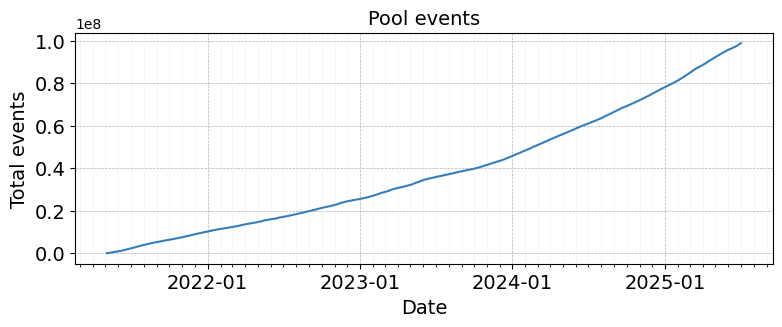

In [6]:
fig = plt.figure(figsize=(9,3))
ax = fig.add_subplot()
ax.set_title('Pool events')
ax.set_xlabel('Date')
ax.set_ylabel('Total events')
ax.plot(block_events['block_timestamp'], np.cumsum(block_events['TOTAL']), color=plot_utils.COLORS[1])
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.grid(linestyle='--', linewidth=0.5, which="major")
ax.grid(linestyle='--', linewidth=0.5, which="minor", alpha=0.2)
plot_utils.set_font_size(ax, 14)
plt.savefig("figures/pool-events.pdf", format='pdf', bbox_inches='tight')
plt.show()

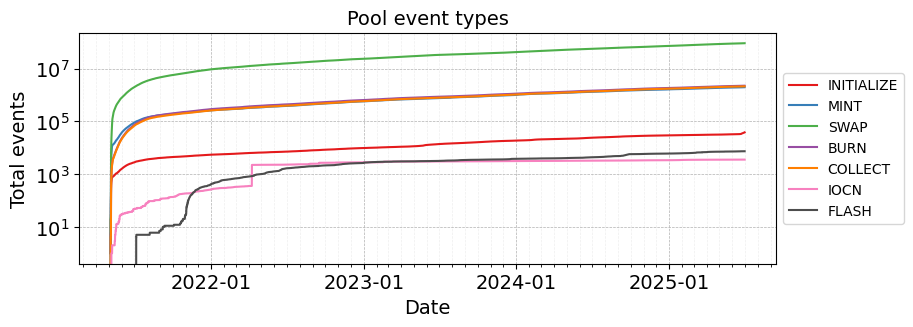

In [7]:
color_id = 0
fig = plt.figure(figsize=(9,3))
ax = fig.add_subplot()
ax.set_title('Pool event types')
ax.set_xlabel('Date')
ax.set_ylabel('Total events')
ax.set_yscale('log')
for signature_type in read_utils.SIGNATURE_TYPES.values():
    ax.plot(block_events['block_timestamp'], np.cumsum(block_events[signature_type]), color=plot_utils.COLORS[color_id], label=signature_type)
    color_id += 1
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.grid(linestyle='--', linewidth=0.5, which="major")
ax.grid(linestyle='--', linewidth=0.5, which="minor", alpha=0.2)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plot_utils.set_font_size(ax, 14)
plt.savefig("figures/pool-events-type.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [8]:
res = block_events.group_by_dynamic("block_timestamp", every="1w", closed="right").agg(
    pl.col("INITIALIZE").sum(), 
    pl.col("MINT").sum(), 
    pl.col("SWAP").sum(),
    pl.col("BURN").sum(),
    pl.col("COLLECT").sum(),
    pl.col("IOCN").sum(),
    pl.col("FLASH").sum()
).sort("block_timestamp").with_columns(TOTAL=pl.sum_horizontal(read_utils.EVENT_TYPES))
res 

block_timestamp,INITIALIZE,MINT,SWAP,BURN,COLLECT,IOCN,FLASH,TOTAL
datetime[μs],i64,i64,i64,i64,i64,i64,i64,i64
2021-05-03 00:00:00,790,12835,150826,3427,3197,2,0,171077
2021-05-10 00:00:00,221,4868,205274,3774,3569,5,0,217711
2021-05-17 00:00:00,215,7172,208123,6079,5749,8,0,227346
2021-05-24 00:00:00,340,11483,212597,8662,8056,15,0,241153
2021-05-31 00:00:00,345,11761,211006,9735,9076,2,0,241925
…,…,…,…,…,…,…,…,…
2025-06-02 00:00:00,200,9041,553390,11040,10575,6,57,584309
2025-06-09 00:00:00,190,10290,610752,12994,12394,3,47,646670
2025-06-16 00:00:00,963,12621,733233,14757,14190,0,61,775825


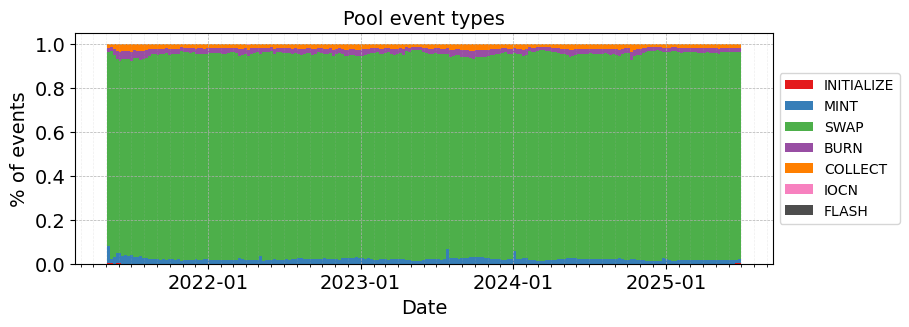

In [9]:
fig = plt.figure(figsize=(9,3))
ax = fig.add_subplot()
ax.set_title('Pool event types')
ax.set_xlabel('Date')
ax.set_ylabel('% of events')
# for signature_type in read_utils.SIGNATURE_TYPES.values():
#     ax.plot(df['block_timestamp'], np.cumsum(df[signature_type]), color=plot_utils.COLORS[color_id], label=signature_type)
#     color_id += 1
ax.stackplot(res['block_timestamp'], 
             res['INITIALIZE']/res['TOTAL'], 
             res['MINT']/res['TOTAL'], 
             res['SWAP']/res['TOTAL'], 
             res['BURN']/res['TOTAL'],
             res['COLLECT']/res['TOTAL'],
             res['IOCN']/res['TOTAL'],
             res['FLASH']/res['TOTAL'],
             colors=plot_utils.COLORS,
             labels=read_utils.SIGNATURE_TYPES.values(), step='post')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.grid(linestyle='--', linewidth=0.5, which="major")
ax.grid(linestyle='--', linewidth=0.5, which="minor", alpha=0.2)
#ax.margins(0,0)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plot_utils.set_font_size(ax, 14)
plt.savefig("figures/pool-events-type-perc.pdf", format='pdf', bbox_inches='tight')
plt.show()

## Event frequencies

In [10]:
def pool_event_frequency(event_type):
    assert event_type in read_utils.EVENT_TYPES
    cdf = pl.read_csv("data/pool_creations.tsv", separator="\t").select("pool_address").rename({"pool_address":"address"})
    tmp = pl.read_csv("results/pool_events.tsv", separator="\t").select("address", event_type)
    return cdf.join(tmp, on="address", how="left").fill_null(0).sort(event_type, descending=True)

In [11]:
for event_type in read_utils.EVENT_TYPES:
    print(f"Plotting for type {event_type}...")
    xdf = pool_event_frequency(event_type)
    data = xdf[event_type]
    title = f"{event_type} distribution"
    xlabel = f"N. of {event_type} events"
    ylabel = "N. of pools"
    xscale = "symlog" if event_type != "INITIALIZE" else "linear"
    yscale = "log"
    output_file = f"figures/pool-dist-{event_type}.pdf"
    ylabel_ecdf = "Fraction of pools"
    yscale_ecdf = "linear"
    output_file_ecdf = f"figures/pool-ecdf-{event_type}.pdf" 
    plot_utils.plot_dist(data, title, xlabel, ylabel, xscale, yscale, output_file)
    plot_utils.plot_ecdf(data, title, xlabel, ylabel_ecdf, xscale, yscale_ecdf, output_file_ecdf)

Plotting for type INITIALIZE...
Plotting for type MINT...
Plotting for type SWAP...
Plotting for type BURN...
Plotting for type COLLECT...
Plotting for type IOCN...
Plotting for type FLASH...


## Swaps

Count the frequency of addresses among swaps.

In [2]:
df = pl.read_csv("results/swap_addr.tsv", separator="\t")
df

address,num_sender,num_recipient
str,i64,i64
"""0xe592427a0aece92de3edee1f18e0…",12740409,3356395
"""0x3b8ccaa89fcd432f1334d35b10ff…",0,7
"""0xdd0d6c26a03d6f6541471d44179f…",0,5
"""0x11e4857bb9993a50c685a79afad4…",0,19
"""0x11921c9c14ba2ccd34cef17c01c0…",0,1
…,…,…
"""0x63913dc7761271b79b0723b4fda1…",0,1
"""0x9be0c584860730849683b48d3bdb…",0,1
"""0xc3d4816d9e0d0708cabe224b1334…",0,1


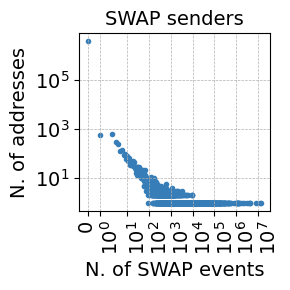

In [3]:
data = df['num_sender']
title = "SWAP senders"
output_file = "figures/swap-sender-freq.pdf"
plot_utils.plot_dist(data, title, "N. of SWAP events", "N. of addresses", "symlog", "log", output_file=output_file, show=True)

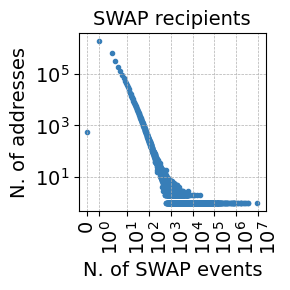

In [4]:
data = df['num_recipient']
title = "SWAP recipients"
output_file = "figures/swap-recipient-freq.pdf"
plot_utils.plot_dist(data, title, "N. of SWAP events", "N. of addresses", "symlog", "log", output_file=output_file, show=True)

In [6]:
df = pl.read_csv("results/swap_txs.tsv", separator="\t")
df

transaction_hash,num_swap
str,i64
"""0x3e0785384a868b0f8b401ad82775…",1
"""0x9f873643fad1ca242ed0a118184e…",1
"""0xc062091cd0737c2e2a5ebd4b8429…",1
"""0xcaf37621d24624aa85fef255d2b5…",2
"""0xda11fc623ffc35e42450c4dedb3c…",1
…,…
"""0x51a31778d18f9031a1e3b73ae0f7…",1
"""0x9020a93762b61b538058cf995fdd…",1
"""0x8720fbba79da8eeddaa016fc96a2…",3


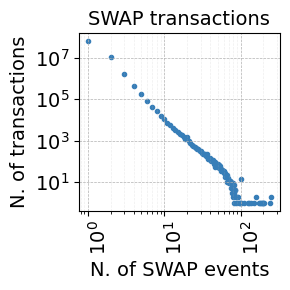

In [7]:
data = df['num_swap']
title = "SWAP transactions"
output_file = "figures/swap-txs.pdf"
plot_utils.plot_dist(data, title, "N. of SWAP events", "N. of transactions", "log", "log", output_file=output_file, show=True)